In [1]:
from pyaccelerator import *
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def test_tune_turn_convergence(lattice):
    scan_turns = [64, 128, 256, 512, 1024, 2048, 5012, 10024]  # np.linspace(100, 5000, 20, dtype=int)
    tunes = []
    for n_turns in scan_turns:
        tunes.append(FODO_thin.tune(n_turns=n_turns))
    plt.plot(scan_turns, tunes)
    plt.xlabel('number of turns')
    plt.ylabel('tune')

# Thin lattice

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:xlabel='s [m]'>)

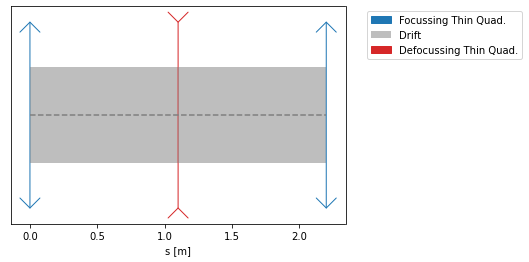

In [3]:
f = 8
l_drift = 1.1

quad_F = QuadrupoleThin(f*2)
quad_D = QuadrupoleThin(-f)
drift = Drift(l_drift)

FODO_thin = Lattice([quad_F, drift, quad_D, drift, quad_F])
lattice_thin = FODO_thin*100
FODO_thin.plot()

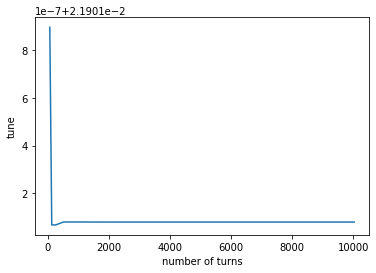

In [4]:
test_tune_turn_convergence(lattice_thin)

In [5]:
FODO_thin.tune()

0.021901080878726845

In [6]:
FODO_thin.chromaticity()

0.021901080878726845
0.021879167037279844


-0.02191384144700076

In [7]:
lattice_thin.tune()

0.19010806395830193

In [8]:
lattice_thin.chromaticity()

0.19010806395830193
0.1879166902479174


-2.1913737103845254

In [9]:
def thin_lattice_factory(strength):
    f = 1/strength
    l_drift = 1.1

    quad_F = QuadrupoleThin(f*2)
    quad_D = QuadrupoleThin(-f)
    drift = Drift(l_drift)

    return Lattice([quad_F, drift, quad_D, drift, quad_F])

/home/lcoyle/projects/accelerator/pyaccelerator/elements/base.py:52: RuntimeWarning: overflow encountered in matmul
  return (self._get_transfer_matrix() @ phase_coords) + self._non_linear_term(
/home/lcoyle/projects/accelerator/pyaccelerator/elements/base.py:52: RuntimeWarning: invalid value encountered in matmul
  return (self._get_transfer_matrix() @ phase_coords) + self._non_linear_term(
/home/lcoyle/projects/accelerator/pyaccelerator/elements/quadrupole.py:187: RuntimeWarning: overflow encountered in double_scalars
  out[1] = -one_over_f * phase_coords[0] + phase_coords[1]


ValueError: x and y must have same first dimension, but have shapes (50,) and (11,)

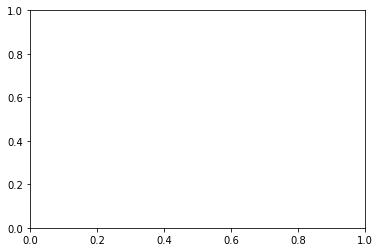

In [11]:
scan_strengths = np.linspace(1, 5, 50)
tunes = []
for strength in scan_strengths:
    try:
        tunes.append(thin_lattice_factory(strength).tune())
    except ValueError:
        continue
plt.plot(scan_strengths, tunes)

# Lattice with a tune > 0.5

In [ ]:
n_cells = 1
f = 1.2
l = 1.1

lat = Lattice([QuadrupoleThin(2*f), Drift(l), QuadrupoleThin(-f), Drift(l), QuadrupoleThin(2*f)]) * n_cells
lat.plot()

In [ ]:
lat.tune()

In [ ]:
lat.chromaticity()

# Thick elements

In [ ]:
k = 1/0.8
l_quad = 0.1
l_drift = 1

quad_F = Quadrupole(k, l_quad/2)
quad_D = Quadrupole(-k, l_quad)
sext_f = Sextupole(1e-3, 0.1)
sext_d = Sextupole(1e-3, 0.1)
drift = Drift(l_drift)

FODO_thick = Lattice([quad_F,
                      sext_f,
                      drift,
                      quad_D,
                      sext_d,
                      drift,
                      quad_F])
lattice_thick = FODO_thick*100
FODO_thick.plot()

In [ ]:
test_tune_turn_convergence(lattice_thick)

In [ ]:
quad_F.m

In [ ]:
quad_D.m

In [ ]:
FODO_thick.tune()

In [ ]:
FODO_thick.tune(dp=1e-6)

In [ ]:
FODO_thick.chromaticity()

In [ ]:
lattice_thick.tune()

In [ ]:
lattice_thick.chromaticity()

In [ ]:
lattice_thick.chromaticity(plane='v')

In [ ]:
test_tune_turn_convergence(FODO_thick)

# More complex

In [ ]:
circumference = 1000
n_cells = 20
cell_length = circumference / n_cells

dipole_length = 5
dipole_angle = 2 * np.pi / (n_cells * 4)
dipole_bending_radius = dipole_length / dipole_angle

quadrupole_length = 3
quadrupole_strength = 1e-2

drift_length = (cell_length - (2 * quadrupole_length) - (4 * dipole_length)) / 6

In [ ]:
dipole = Dipole(dipole_bending_radius, dipole_angle)
quad_f_half = Quadrupole(quadrupole_strength, quadrupole_length / 2, name='quad_f')
quad_d = Quadrupole(-quadrupole_strength, quadrupole_length, name='quad_d')
drift = Drift(drift_length)
drift_half = Drift(drift_length / 2)

In [ ]:
l_sext = 0.5
k_sext_f = 1e-3
k_sext_d = -1e-3
sext_f = Sextupole(k_sext_f, l_sext, name="sextupole_f")
sext_d = Sextupole(k_sext_d, l_sext, name="sextupole_d")
FODO_sext = Lattice([quad_f_half,
                     sext_f,
                     Drift(drift_length - l_sext),
                     dipole,
                     drift,
                     dipole,
                     drift,
                     quad_d,
                     sext_d,
                     Drift(drift_length - l_sext),
                     dipole,
                     drift,
                     dipole,
                     drift,
                     quad_f_half
                     ])
FODO_sext.plot()
FODO_sext.plot.top_down()
lattice_sext = FODO_sext * n_cells

In [ ]:
test_tune_turn_convergence(lattice_sext)

In [ ]:
FODO_sext.twiss('h').plot()

In [ ]:
FODO_sext.dispersion().plot('h')

In [ ]:
FODO_sext.tune(dp=0)

In [ ]:
FODO_sext.tune(dp=1e-3)

In [ ]:
lattice_sext.tune()

In [ ]:
lattice_sext.tune(dp=1e-3)

In [ ]:
FODO_sext.chromaticity()

In [ ]:
FODO_sext.chromaticity('v')

In [ ]:
lattice_sext.chromaticity()

In [ ]:
lattice_sext.chromaticity('v')